In [1]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

In [12]:
app = FaceAnalysis(name='buffalo_l', root='./', providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find mode

In [13]:
known_faces = {}

saud_img = cv2.imread('Saud.jpg')
saud_faces = app.get(saud_img)
if len(saud_faces) > 0:
    known_faces['Saud'] = saud_faces[0].embedding

ahmed_img = cv2.imread('Ahmed.jpg')
ahmed_faces = app.get(ahmed_img)
if len(ahmed_faces) > 0:
    known_faces['Ahmed'] = ahmed_faces[0].embedding

In [14]:
def recognize_face(embedding):
    if len(known_faces) == 0:
        return 'Unknown'
    
    best_match = 'Unknown'
    best_score = 0.4
    
    for name, known_emb in known_faces.items():
        similarity = cosine_similarity([embedding], [known_emb])[0][0]
        if similarity > best_score:
            best_score = similarity
            best_match = name
    
    return best_match

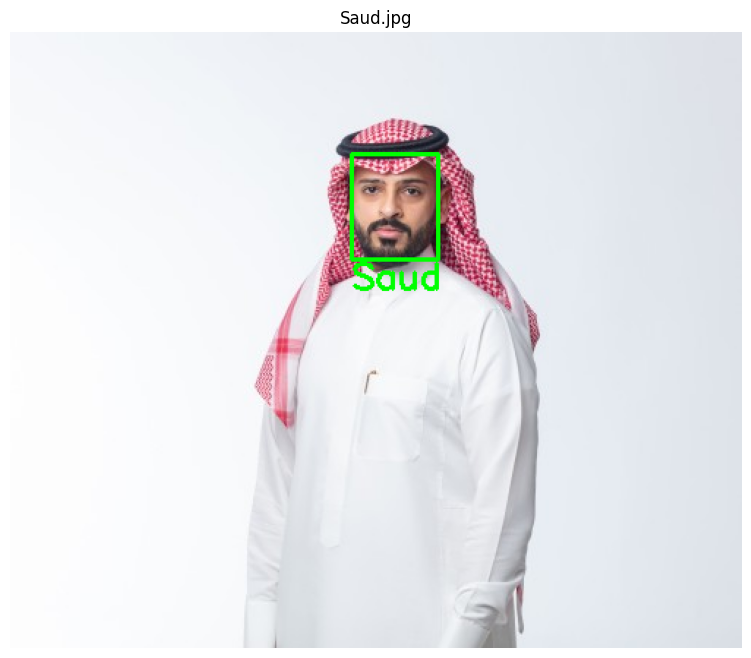

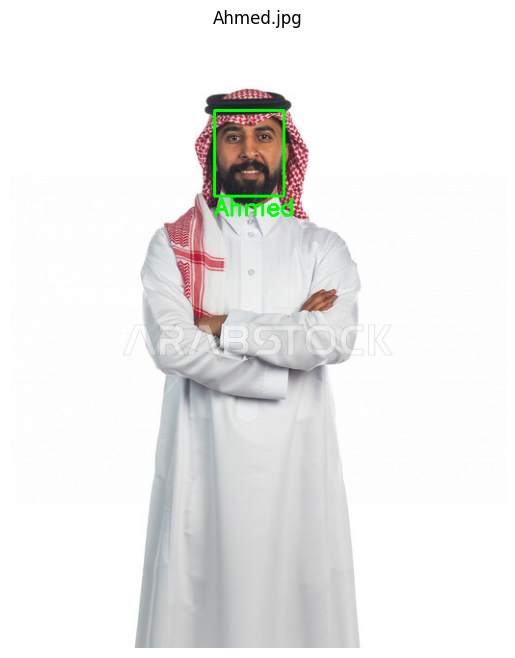

In [15]:
test_images = ['Saud.jpg', 'Ahmed.jpg']

for img_path in test_images:
    img = cv2.imread(img_path)
    faces = app.get(img)
    
    for face in faces:
        bbox = face.bbox.astype(int)
        name = recognize_face(face.embedding)
        
        cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
        cv2.putText(img, name, (bbox[0], bbox[3] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.title(img_path)
    plt.axis('off')
    plt.show()